In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    

In [2]:
data = pd.read_csv("creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
fraud = data[data.Class == 1]
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [5]:
non_fraud = data[data.Class == 0]
non_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
print("Shape of fraud data:", fraud.shape)
print("Shape of non-fraus data:", non_fraud.shape)

Shape of fraud data: (492, 31)
Shape of non-fraus data: (284315, 31)


# Balancing the Dataset

In [7]:
nan_fraud_balanced = non_fraud.sample(fraud.shape[0])
fraud.shape

(492, 31)

In [8]:
data = pd.concat([nan_fraud_balanced,fraud], ignore_index = True , sort=False)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,56179.0,0.741315,-1.888548,-1.914752,-1.323688,1.259324,3.330370,-0.306384,0.603934,-0.981734,...,-0.276237,-1.184030,-0.369550,1.070932,0.457881,1.067273,-0.136530,0.056191,379.48,0
1,77693.0,1.347283,0.365949,-0.277916,0.784055,0.451706,-0.157267,0.214748,-0.167423,0.014076,...,-0.060893,-0.094913,-0.275241,-0.992829,0.889644,-0.242817,0.015100,0.006721,2.25,0
2,60643.0,1.169799,0.010329,-0.103291,1.027133,0.374526,0.597062,-0.001075,0.109664,0.381752,...,-0.250105,-0.693939,-0.159609,-1.348630,0.607120,-0.384967,0.030531,0.015797,54.77,0
3,165002.0,0.206184,-0.030933,0.892857,-0.486479,-0.059656,0.659817,-0.300566,0.296813,-0.874256,...,-0.031396,0.461820,-0.079507,0.301150,-0.268348,-0.587577,0.115896,0.018589,12.90,0
4,163884.0,2.143342,0.116238,-2.393137,-0.033477,1.279262,-0.229867,0.616479,-0.316129,-0.264930,...,0.108084,0.532009,-0.125997,-0.086211,0.517957,0.715017,-0.110253,-0.094828,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [9]:
data.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [10]:
x = data.drop("Class", axis = 1)
y = data.Class

# Training and Testing Part

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
xtrain.shape

(787, 30)

In [13]:
xtest.shape

(197, 30)

# Standardation

In [14]:
scaler = StandardScaler()

In [15]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

# 3D Format

In [16]:
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest =xtest.reshape(xtest.shape[0],xtest.shape[1],1)

xtrain.shape, xtest.shape

((787, 30, 1), (197, 30, 1))

# CNN Implementation

In [17]:
cnn = keras.Sequential([
    keras.layers.Conv1D(32, 2, activation = "relu", input_shape = (30,1)),
    keras.layers.Dropout(0.1),
    
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv1D(64, 2, activation = "relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.4),
    
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(1, activation = "sigmoid")
    
])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                        

In [19]:
cnn.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy"])

In [20]:
history = cnn.fit(xtrain, ytrain, epochs = 20, validation_data=( xtest, ytest), verbose=1)

Epoch 1/20
25/25 [==============================] - 4s 98ms/step - loss: 0.3609 - accuracy: 0.8285 - val_loss: 0.4608 - val_accuracy: 0.9289
Epoch 2/20
25/25 [==============================] - 1s 59ms/step - loss: 0.2375 - accuracy: 0.9136 - val_loss: 0.4273 - val_accuracy: 0.9188
Epoch 3/20
25/25 [==============================] - 2s 60ms/step - loss: 0.1953 - accuracy: 0.9327 - val_loss: 0.3913 - val_accuracy: 0.9340
Epoch 4/20
25/25 [==============================] - 1s 54ms/step - loss: 0.1975 - accuracy: 0.9250 - val_loss: 0.3566 - val_accuracy: 0.9188
Epoch 5/20
25/25 [==============================] - 2s 70ms/step - loss: 0.1729 - accuracy: 0.9352 - val_loss: 0.3480 - val_accuracy: 0.9289
Epoch 6/20
25/25 [==============================] - 1s 56ms/step - loss: 0.1668 - accuracy: 0.9365 - val_loss: 0.3123 - val_accuracy: 0.9239
Epoch 7/20
25/25 [==============================] - 1s 60ms/step - loss: 0.1747 - accuracy: 0.9377 - val_loss: 0.2734 - val_accuracy: 0.9289
Epoch 8/20
25

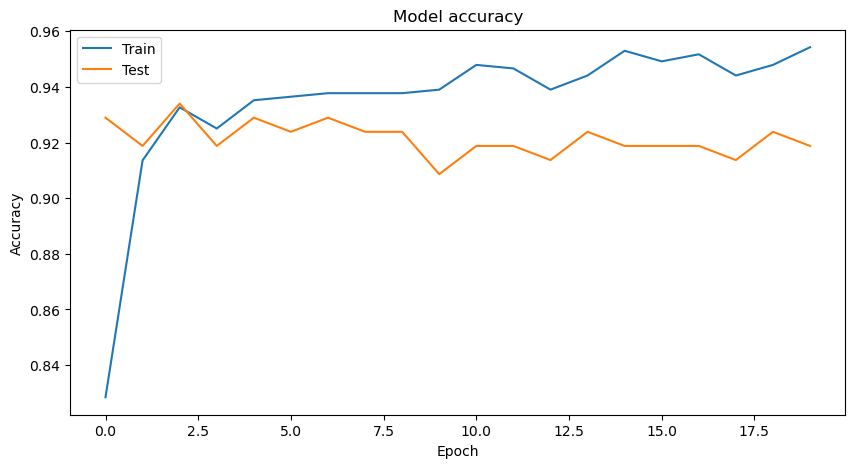

In [21]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

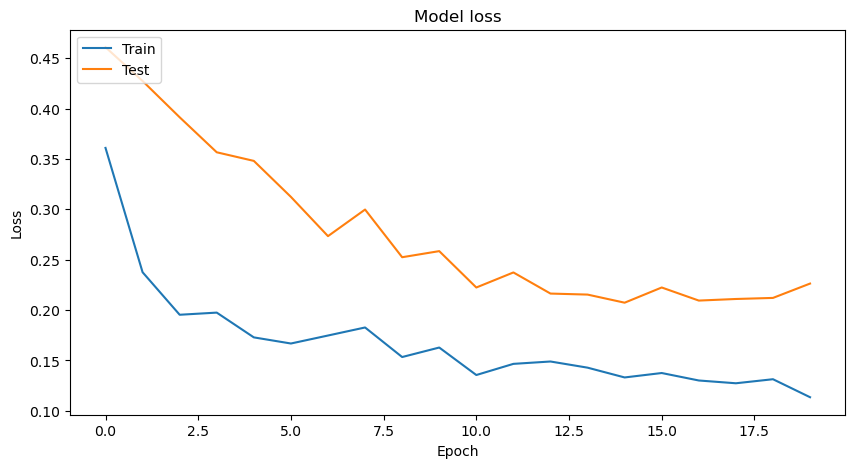

In [22]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()